### Decision tree on credit risk data set

Use decision trees to classify if a loan applicant is a good or bad credit risk using the Credit Risk dataset. 

In [14]:
import numpy as np
import pandas as pd

In [15]:
credit = pd.read_csv("credit_risk.csv")
credit.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [16]:
credit.info()                                        # Understanding the various attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [17]:


credit.shape

(1000, 21)

In [18]:
x = credit.columns.drop("class")                       #Setting the predictors and target:
y = credit["class"]                 
credit[x].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [19]:
credit[x].shape

(1000, 20)

In [20]:
y.shape

(1000,)

In [21]:
credit_cat = pd.get_dummies(credit[x])                # Encoding all the predictor variables to 
                                                      #convert the categorical values to numerical values.
credit_cat.shape


(1000, 61)

In [22]:
credit_cat.columns

Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [23]:
from sklearn.model_selection import train_test_split                 #Splitting the data into train and test sets
xtrain , xtest , ytrain, ytest = train_test_split(credit_cat,y,test_size=0.15 , random_state = 100)
print("xtrain shape:", xtrain.shape)
print("xtest shape:",xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:",ytest.shape)

xtrain shape: (850, 61)
xtest shape: (150, 61)
ytrain shape: (850,)
ytest shape: (150,)


### Building the  decision tree model using Scikit-Learn

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 1)       # Creating an object of the DecisionTreeClassifier model
model.fit(xtrain,ytrain)                               # Training model on the training data
train_predictions = model.predict(xtrain)              # Predicting target values using the model built on training data
test_predictions = model.predict(xtest)

### Visualizing the decision tree the export_graphviz() function of the sklearn

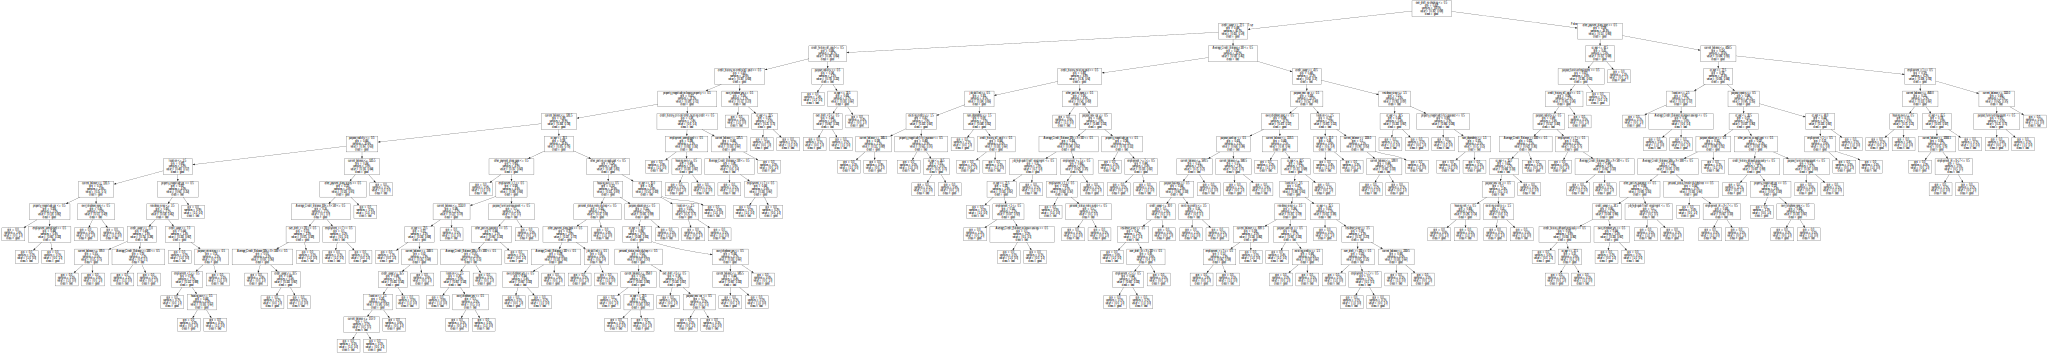

In [25]:
# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline


# Generating the tree

dot_data = export_graphviz(model, out_file=None,
                          feature_names=credit_cat.columns,  
                          class_names=model.classes_,proportion = True ,)
graph = graphviz.Source(dot_data) 
graph


### Evaluating Performance of a model

In [26]:
train_accuracy = model.score(xtrain,ytrain)
test_accuracy = model.score(xtest,ytest)
print("The accuracy of model on training data is: ", train_accuracy)
print("The accuracy of model on test data is: ", test_accuracy)

The accuracy of model on training data is:  1.0
The accuracy of model on test data is:  0.6533333333333333


It's  observed that the training accuracy is 100% and the test accuracy is approximately 67%.

This could mean that the model is overfit to the training data and is not a good approximation of the input to output mapping.

In order to avoid this problem, certain hyperparameters of the decision tree algorithmcan be tuned.

Hyperparameters are model properties which guide the training process i.e. they cannot be learnt from the training data.

below code demonstrates creating two models with different values for the following hyper-parameters:

min_samples_split: The minimum number of instances that should be at a node before the algorithm does a further split on it.

min_impurity_decrease: The minimum percentage reduction in the impurity of a set (as measured by gini index) required to make a split.

In [33]:
#model 1
model1 = DecisionTreeClassifier(min_samples_split = 10 , min_impurity_decrease = 0.0005)
model1.fit(xtrain,ytrain)
train_model1_accuracy = model1.score(xtrain,ytrain)
test_model1_accuracy = model1.score(xtest,ytest)
print("model accuracy when hyperparameters are included on training data :", train_model1_accuracy)
print("model accuracy when hyperparameters are included on test data:", test_model1_accuracy)

model accuracy when hyperparameters are included on training data : 0.9141176470588235
model accuracy when hyperparameters are included on test data: 0.6866666666666666


In [34]:
#model 2
model1 = DecisionTreeClassifier(min_samples_split = 20 , min_impurity_decrease = 1)
model1.fit(xtrain,ytrain)
train_model1_accuracy = model1.score(xtrain,ytrain)
test_model1_accuracy = model1.score(xtest,ytest)
print("model accuracy when hyperparameters are included on training data :", train_model1_accuracy)
print("model accuracy when hyperparameters are included on test data:", test_model1_accuracy)

model accuracy when hyperparameters are included on training data : 0.6976470588235294
model accuracy when hyperparameters are included on test data: 0.7133333333333334


we can observe that with different values of hyperparameters, we can get different accuracy and reduce overfitting.